In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
–ú–µ—Ç–æ–¥ k –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç –Ω–æ–≤–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –¥–æ –≤—Å–µ—Ö –æ–±—ä–µ–∫—Ç–æ–≤ –≤—ã–±–æ—Ä–∫–∏ –∏, –æ—Ç–±–∏—Ä–∞—è k –±–ª–∏–∂–∞–π—à–∏—Ö, –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é –≥–æ–ª–æ—Å–æ–≤–∞–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏) –∏–ª–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏—è (–≤ —Å–ª—É—á–∞–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏). \
–ü—Ä–∏ —ç—Ç–æ–º —ç—Ç–æ—Ç –º–µ—Ç–æ–¥ –º–æ–∂–Ω–æ –ø–æ-—Ä–∞–∑–Ω–æ–º—É –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å —Å–ø–æ—Å–æ–± –ø–æ–¥—Å—á–µ—Ç–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –∏–ª–∏ —Å–ø–æ—Å–æ–± –≤–∑–≤–µ—à–∏–≤–∞–Ω–∏—è —Å–æ—Å–µ–¥–µ–π –ø–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é. \
–î–ª—è –Ω–∞—á–∞–ª–∞ —Å–∫–∞—á–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç –∏ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ.

In [64]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

X      Y  class
0  0.70 -0.247    0.0
1 -3.95  2.740    1.0
2  0.15 -2.160    1.0
3 -1.67 -0.942    1.0
4  2.56 -1.850    1.0

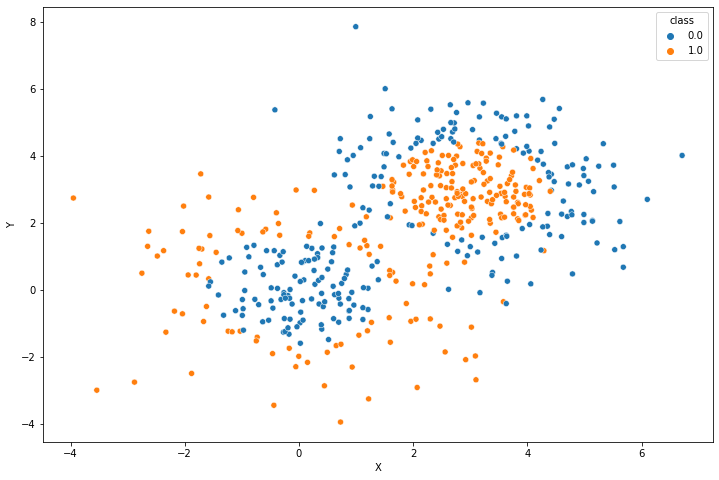

In [65]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**–ó–∞–¥–∞–Ω–∏–µ 1.** –û–±—É—á–∏—Ç–µ –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –Ω–∞—Ä–∏—Å—É–π—Ç–µ —Ä–∞–∑–¥–µ–ª—è—é—â—É—é –≥–∏–ø–µ—Ä–ø–ª–æ—Å–∫–æ—Å—Ç—å (–ø—Ä—è–º—É—é) –Ω–∞ —Ä–∏—Å—É–Ω–∫–µ —Å –¥–∞–Ω–Ω—ã–º–∏. –ö–∞–∫ –ª–∏–Ω–µ–π–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä —Å–ø—Ä–∞–≤–∏–ª—Å—è —Å –∑–∞–¥–∞—á–µ–π? –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥ –∏—Å—Ö–æ–¥—è –∏–∑ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –ª–∏–Ω–∏–∏ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è. –ö–∞–∫–æ–π accuracy –≤—ã–π–¥–µ—Ç –Ω–∞ –≤—Å–µ–π –≤—ã–±–æ—Ä–∫–µ (–±–µ–∑ –≤–∞–ª–∏–¥–∞—Ü–∏–∏)?

In [66]:
from sklearn.linear_model import LogisticRegression
X = circ.drop('class', axis = 1)
y = circ['class']

LR = LogisticRegression()
LR.fit(X, y)

LR.score(X, y)


# sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);
# plt.plot(circ['X'], LR.predict(circ['X']), color = 'green')



0.424

**–ó–∞–¥–∞–Ω–∏–µ 2.** –†–∞–∑–¥–µ–ª–∏—Ç–µ –æ–±—É—á–∞—é—â—É—é –≤—ã–±–æ—Ä–∫—É –∏ –æ–±—É—á–∏—Ç–µ 6 –º–æ–¥–µ–ª–µ–π kNN —Å —Ä–∞–∑–ª–∏—á–Ω—ã–º —á–∏—Å–ª–æ–º —Å–æ—Å–µ–¥–µ–π –∏–∑ `all_k`, —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫. \
–í—ã–≤–µ–¥–∏—Ç–µ accuracy –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏. –ö–∞–∫–æ–≤–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è accuracy?

In [67]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
all_k = [1, 3, 10, 30, 40, 60]

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid = {'n_neighbors' : all_k}, scoring = 'accuracy')
grid.fit(X_train, y_train)

grid.score(X_test, y_test)


0.87

In [70]:
print(grid.best_params_)

{'n_neighbors': 3}


In [71]:
grid.cv_results_

{'mean_fit_time': array([0.00098195, 0.00010352, 0.00049052, 0.00034218, 0.00308318,
        0.00431275]),
 'std_fit_time': array([0.00103154, 0.00020704, 0.00060957, 0.00068436, 0.00378717,
        0.00098323]),
 'mean_score_time': array([0.00338793, 0.00765486, 0.00782547, 0.00857596, 0.00925431,
        0.01925597]),
 'std_score_time': array([0.00238519, 0.00174781, 0.00426102, 0.00199034, 0.00681023,
        0.00211725]),
 'param_n_neighbors': masked_array(data=[1, 3, 10, 30, 40, 60],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 10},
  {'n_neighbors': 30},
  {'n_neighbors': 40},
  {'n_neighbors': 60}],
 'split0_test_score': array([0.8875, 0.8625, 0.9125, 0.85  , 0.8   , 0.7125]),
 'split1_test_score': array([0.85  , 0.85  , 0.85  , 0.775 , 0.65  , 0.5875]),
 'split2_test_score': array([0.925 , 0.95  , 0.9375, 0.825 , 0.8125, 0.725 ]),
 'split

In [72]:
answer = {}
for k in all_k:
    
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    
    answer[k] = knn.score(X_test, y_test)


In [73]:
answer

{1: 0.89, 3: 0.87, 10: 0.85, 30: 0.74, 40: 0.75, 60: 0.73}

In [74]:
for i in answer.keys():
    if answer[i] == max(answer.values()):
        print (i , answer[i])

1 0.89


**–ó–∞–¥–∞–Ω–∏–µ 3.** (–±–æ–Ω—É—Å–Ω–æ–µ) –°–∫–∞—á–∞–π—Ç–µ –±–∏–±–ª–∏–æ—Ç–∫—É [mlxtend](http://rasbt.github.io/mlxtend/#examples) –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π. 
–í –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –æ–∑–Ω–∞–∫–æ–º–∏—Ç—å—Å—è —Å [–ø—Ä–∏–º–µ—Ä–∞–º–∏](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. \
–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–∏—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤ –¥–ª—è —à–µ—Å—Ç–∏ –æ–±—É—á–µ–Ω–Ω—ã—Ö –Ω–∞–º–∏ kNN.

1. –ü–æ–¥–±–µ—Ä–∏—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã `gridspec.GridSpec()` –∏ `itertools.product()` –¥–ª—è –Ω–∞—à–µ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–æ–≤. 
2. –£–¥–æ–±–Ω–æ –ø–µ—Ä–µ–¥ –≤–∏–∑—É–ª–∏–∑–∞—Ü–∏–µ–π —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –æ–±—É—á–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä—ã –≤ —Å–ø–∏—Å–æ–∫ `all_clfs`.
3. –ü—Ä–æ—è–≤–∏—Ç–µ —Ç–µ—Ä–ø–µ–Ω–∏–µ! –û—Ç—Ä–∏—Å–æ–≤–∫–∞ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π –º–æ–∂–µ—Ç –∑–∞–Ω–∏–º–∞—Ç—å –ø–∞—Ä—É –º–∏–Ω—É—Ç.

In [75]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

ModuleNotFoundError: No module named 'mlxtend'

In [76]:
### Your code is here




1. –ö–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Ä–µ—à–∞—é—â–∞—è –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç—å —Å —Ä–æ—Å—Ç–æ–º —á–∏—Å–ª–∞ —Å–æ—Å–µ–¥–µ–π?
2. –ö–∞–∫–æ–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –≥–µ–æ–º–µ—Ç—Ä–∏–∏ —Ä–µ—à–∞—é—â–∏—Ö –ø–æ–≤–µ—Ä—Ö–Ω–æ—Å—Ç–µ–π? –ü–æ—è—Å–Ω–∏—Ç–µ —Å–≤–æ–π –æ—Ç–≤–µ—Ç, –æ–ø–∏—Ä–∞—è—Å—å –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≥—Ä–∞—Ñ–∏–∫–∏.
3. –õ—É—á—à–µ –ª–∏ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è kNN –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –ª–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π?

**–ó–∞–¥–∞–Ω–∏–µ 4.** –°–∫–∞—á–∞–π—Ç–µ —É–∂–µ –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –¥–∞—Ç–∞—Å–µ—Ç [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∏ –Ω–µ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Å—Ä–µ–¥–∏ $k \in [1, 5, 10]$. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ. \
–ü–æ—á–µ–º—É –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –ø–æ–º–æ–≥–∞–µ—Ç —É–ª—É—á—à–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ?

In [90]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

Trip_Distance  Customer_Since_Months  Life_Style_Index  Customer_Rating  \
0           6.77                    1.0           2.42769          3.90500   
1          29.47                   10.0           2.78245          3.45000   
2          41.58                   10.0           2.79805          3.50125   
3          61.56                   10.0           2.79805          3.45375   
4          54.95                   10.0           3.03453          3.40250   

   Cancellation_Last_1Month  Var1  Var2  Var3  Surge_Pricing_Type  \
0                         0  40.0    46    60                   2   
1                         0  38.0    56    78                   2   
2                         2  61.0    56    77                   2   
3                         0  61.0    52    74                   3   
4                         4  51.0    49   102                   2   

   Type_of_Cab_B  ...  Destination_Type_F  Destination_Type_G  \
0              1  ...                   0                   0   
1              1  ...                   0                   0   
2              1  ...                   0                   0   
3              0  ...                   0                   0   
4              0  ...                   0                   0   

   Destination_Type_H  Destination_Type_I  Destination_Type_J  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_K  Destination_Type_L  Destination_Type_M  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Destination_Type_N  Gender_Male  
0                   0            0  
1                   0            1  
2                   0            1  
3                   0            1  
4                   0            1  

[5 rows x 29 columns]

In [91]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [81]:
all_k = [1, 5, 10]

answer_2 = {}
for k in all_k:
    
    knn_2 = KNeighborsClassifier(n_neighbors= k)
    knn_2.fit(X_train, y_train)
    
    answer_2[k] = knn_2.score(X_test, y_test)

print(answer_2)
for i in answer_2.keys():
    if answer_2[i] == max(answer_2.values()):
        print (i , answer_2[i])


{1: 0.43819542019519236, 5: 0.44317016671097104, 10: 0.4703603843086621}
10 0.4703603843086621


In [82]:
! telegram-send –≥–æ—Ç–æ–≤–æ

**–ó–∞–¥–∞–Ω–∏–µ 5.** –û–±—É—á–∏—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä kNN –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–µ—Ç—Ä–∏–∫–∏ –ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

–ó–Ω–∞—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `p` –≤–æ–∑—å–º–∏—Ç–µ —Ä–∞–≤–Ω—ã–º –µ–¥–∏–Ω–∏—Ü–µ. –ó–∞–º–µ—Ä—å—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ —Å –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–∞–¥–∞–Ω–∏–µ–º, –≥–¥–µ `p = 2`.

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('knn_3', KNeighborsClassifier(n_neighbors= 10, p = 1))])

pipe.fit(X_train, y_train)
    
pipe.score(X_test, y_test)


0.6611476094634109

In [95]:
! telegram-send –≥–æ—Ç–æ–≤–æ

**–ó–∞–¥–∞–Ω–∏–µ 6.** –°–∫–∞—á–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), –≤ –∫–æ—Ç–æ—Ä–æ–º –º—ã –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å —Å—Ä–µ–¥–Ω—é—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è. –í –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å `['longitude', 'latitude']`, –ø–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ –Ω–∏—Ö —Å –ø–æ–º–æ—â—å—é scatterplot. \
–ü–æ –∫–∞–∫–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–µ –Ω–∞—à kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ –ø–æ–¥–±–∏—Ä–∞–µ—Ç —Å–æ—Å–µ–¥–µ–π?

1. –û–±—É—á–∏—Ç–µ –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –∑–∞–º–µ—Ä—å—Ç–µ RMSE –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö.
2. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã $k \in [1, 2, ..., 9]$. 
3. –û–±—É—á–∏—Ç–µ kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä —Å –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º —è–¥—Ä–æ–º, –ø–æ–¥–æ–±—Ä–∞–≤ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞ —Å—Ä–µ–¥–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö $h \in np.arange(0.02, 0.1, 0.01)$.

–ö–∞–∫ —à–∏—Ä–∏–Ω–∞ –æ–∫–Ω–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Å–∞ –ø—Ä–∏ —É—Å—Ä–µ–¥–Ω–µ–Ω–∏–∏ –æ—Ç–≤–µ—Ç–∞ –ø–æ —Å–æ—Å–µ–¥—è–º? 

In [109]:
df = pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

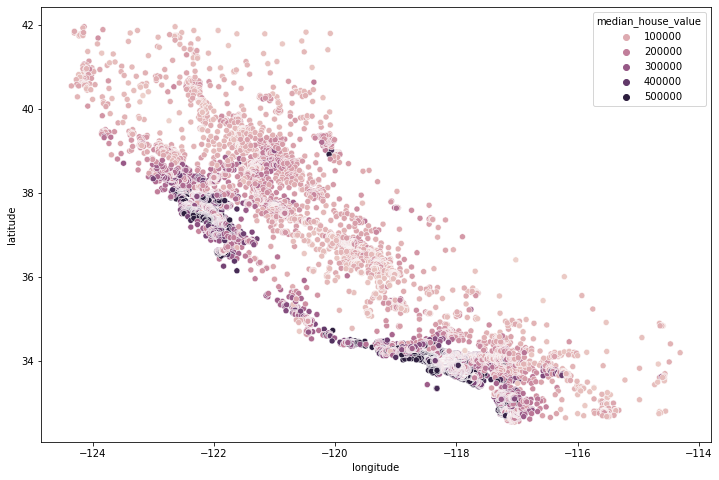

In [110]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [99]:
# –û–±—É—á–∏v –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é –∏ –∑–∞–º–µ—Ä—å—Ç–µ RMSE –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR_2 = LinearRegression()
LR_2.fit(X_train, y_train)

print(f'RMSE –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ {round(mean_squared_error(y_train, LR_2.predict(X_train))**0.5, 3)}')
print(f'RMSE –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ —Ç–µ—Å—Ç–µ {round(mean_squared_error(y_test, LR_2.predict(X_test))**0.5, 3)}')


RMSE –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ —Ç—Ä–µ–π–Ω–µ 100948.4
RMSE –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ —Ç–µ—Å—Ç–µ 98369.877


In [120]:
# –û–±—É—á–∏–º kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä –Ω–∞ –æ—Ç–Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–æ–±—Ä–∞–≤ –ª—É—á—à–∏–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã  ùëò‚àà[1,2,...,9] .

param_grid = {'knn_4__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9]}

pipe_2 = Pipeline([('scaler', StandardScaler()), ('knn_4', KNeighborsClassifier())])

grid_2 = GridSearchCV(pipe_2, param_grid, scoring = 'neg_mean_squared_error')
grid_2.fit(X_train, y_train)

print(f'RMSE kNN –Ω–∞ —Ç—Ä–µ–π–Ω–µ : \t {(-1*grid_2.score(X_train, y_train))**0.5}')
print(f'RMSE kNN –Ω–∞ —Ç–µ—Å—Ç–µ: \t {(-1*grid_2.score(X_test, y_test))**0.5}')

RMSE kNN –Ω–∞ —Ç—Ä–µ–π–Ω–µ : 	 34616.72513607228
RMSE kNN –Ω–∞ —Ç–µ—Å—Ç–µ: 	 62929.440900187365


In [123]:
print(grid_2.best_params_)

{'knn_4__n_neighbors': 1}


In [125]:
# –û–±—É—á–∏–º kNN —Ä–µ–≥—Ä–µ—Å—Å–æ—Ä —Å –≥–∞—É—Å—Å–æ–≤—Å–∫–∏–º —è–¥—Ä–æ–º, 
# –ø–æ–¥–æ–±—Ä–∞–≤ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —à–∏—Ä–∏–Ω—ã –æ–∫–Ω–∞ —Å—Ä–µ–¥–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–Ω—ã—Ö  ‚Ñé‚ààùëõùëù.ùëéùëüùëéùëõùëîùëí(0.02,0.1,0.01) .
from sklearn.neighbors import KNeighborsRegressor
h_ = np.arange(0.02, 0.1, 0.01)

all_ans = {}

for h in h_:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn_5 = KNeighborsRegressor(n_neighbors=1, weights=kernel)
    knn_5.fit(X_train, y_train)
    
    all_ans[h] = round(mean_squared_error(y_test, knn_5.predict(X_test))**0.5, 3)

In [126]:
all_ans

{0.02: 62965.399,
 0.03: 62965.399,
 0.039999999999999994: 62965.399,
 0.049999999999999996: 62965.399,
 0.06: 62965.399,
 0.06999999999999999: 62965.399,
 0.07999999999999999: 62965.399,
 0.09: 62965.399}